In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
############ COMPARE RADIAL DISTRIBUTION OF HORIZONTAL WIND SPEED  ############
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [10]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"  
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/"  
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/"


fileName = 'radWS.txt'

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"


In [3]:
#%% Extract time series of 1-min maximum wind speed
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',')
file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',')
file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',')
file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',')
file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',')


In [4]:
#%% Variables
# Files with interpolation at z = 10m
r_26 = file_26[:,0]
ws_26 = file_26[:,1]

r_28 = file_28[:,0]
ws_28 = file_28[:,1]

r_30 = file_30[:,0]
ws_30 = file_30[:,1]

r_32 = file_32[:,0]
ws_32 = file_32[:,1]

r_34 = file_34[:,0]
ws_34 = file_34[:,1]

In [5]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_34]


In [59]:
#%% Eyewall for each case
r_eye_26 = 13805 #13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


Text(0.5, 0, '$\\hat{r}$ [-]')

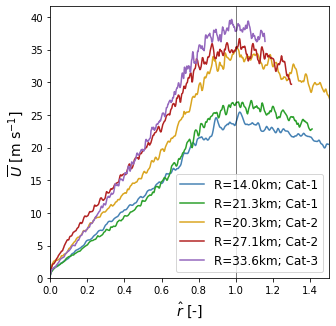

In [53]:
#%% Figure showing radial distribution of horizontal wind speed
limX = 1.5 #np.max([r_26[-1],r_28[-1],r_30[-1],r_32[-1]])
limY = 1.05*np.max([np.max(ws_26),np.max(ws_28),np.max(ws_30),np.max(ws_32),np.max(ws_34)])

mpyplot.figure(figsize=(5,5))
mpyplot.plot(r_26*(13805/14500),ws_26,color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.plot(r_28*(21300/20500),ws_28,color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.plot(r_30,ws_30,color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.plot(r_32*(27055/26000),ws_32,color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.plot(r_34,ws_34,color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
mpyplot.legend(fontsize=12,loc=4,ncol=1)

mpyplot.plot([1,1],[0,limY],'-k',linewidth=0.5)
mpyplot.xlim(0,limX)
mpyplot.ylim(0,limY)

mpyplot.ylabel(r'$\overline{U}$ [m s$^{-1}$]',fontsize=14)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)


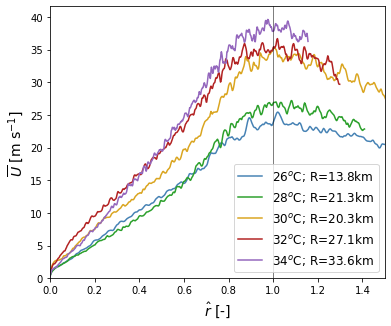

In [60]:
#%% Figure showing radial distribution of horizontal wind speed
limX = 1.5 #np.max([r_26[-1],r_28[-1],r_30[-1],r_32[-1]])
limY = 1.05*np.max([np.max(ws_26),np.max(ws_28),np.max(ws_30),np.max(ws_32),np.max(ws_34)])

mpyplot.figure(figsize=(6,5))
mpyplot.plot(r_26*(13805/14500),ws_26,color=col_26,label=r'26$^o$C; R='+str(np.round(r_eye_26/1000,1))+'km')
mpyplot.plot(r_28*(21300/20500),ws_28,color=col_28,label=r'28$^o$C; R='+str(np.round(r_eye_28/1000,1))+'km')
mpyplot.plot(r_30,ws_30,color=col_30,label=r'30$^o$C; R='+str(np.round(r_eye_30/1000,1))+'km')
mpyplot.plot(r_32*(27055/26000),ws_32,color=col_32,label=r'32$^o$C; R='+str(np.round(r_eye_32/1000,1))+'km')
mpyplot.plot(r_34,ws_34,color=col_34,label=r'34$^o$C; R='+str(np.round(r_eye_34/1000,1))+'km')
mpyplot.legend(fontsize=12,loc=4,ncol=1)

mpyplot.plot([1,1],[0,limY],'-k',linewidth=0.5)
mpyplot.xlim(0,limX)
mpyplot.ylim(0,limY)

mpyplot.ylabel(r'$\overline{U}$ [m s$^{-1}$]',fontsize=14)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)

mpyplot.savefig(dirFig + "r_winds.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

Text(0.5, 0, '$\\hat{r}$ [-]')

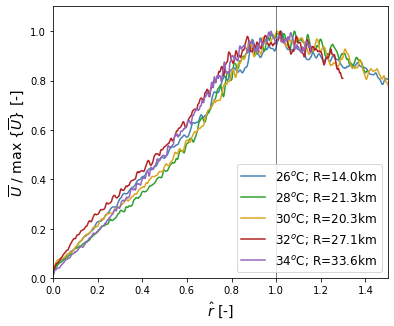

In [58]:
#%% Figure showing radial distribution of horizontal wind speed
limX = 1.5 #np.max([r_26[-1],r_28[-1],r_30[-1],r_32[-1]])
limY = 1.05*np.max([np.max(ws_26),np.max(ws_28),np.max(ws_30),np.max(ws_32),np.max(ws_34)])
limY = 1.1

mpyplot.figure(figsize=(6,5))
mpyplot.plot(r_26*(13805/14500),ws_26/np.nanmax(ws_26),color=col_26,label=r'26$^o$C; R='+str(np.round(r_eye_26/1000,1))+'km')
mpyplot.plot(r_28*(21300/20500),ws_28/np.nanmax(ws_28),color=col_28,label=r'28$^o$C; R='+str(np.round(r_eye_28/1000,1))+'km')
mpyplot.plot(r_30,ws_30/np.nanmax(ws_30),color=col_30,label=r'30$^o$C; R='+str(np.round(r_eye_30/1000,1))+'km')
mpyplot.plot(r_32*(27055/26000),ws_32/np.nanmax(ws_32),color=col_32,label=r'32$^o$C; R='+str(np.round(r_eye_32/1000,1))+'km')
mpyplot.plot(r_34,ws_34/np.nanmax(ws_34),color=col_34,label=r'34$^o$C; R='+str(np.round(r_eye_34/1000,1))+'km')
mpyplot.legend(fontsize=12,loc=4,ncol=1)

mpyplot.plot([1,1],[0,limY],'-k',linewidth=0.5)
mpyplot.xlim(0,limX)
mpyplot.ylim(0,limY)

mpyplot.ylabel(r'$\overline{U}$ \, max {$\overline{U}$} [-]',fontsize=14)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)